# 이진 분류(Binary Classification)
### Mask Detection: Mask, NoMask 이미지 분류하기
---

### 필요한 라이브러리 불러오기

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터셋 구축
```
dataset
├─ train
│  ├─ Mask
│  └─ NoMask
├─ val
│  ├─ Mask
│  └─ NoMask
└─ test
    ├─ Mask
    └─ NoMask
```

In [ ]:
# !pip install --upgrade --no-cache-dir gdown

In [ ]:
# !gdown https://drive.google.com/uc?id=12FIGFL_-WnKTTOo8AC_eh3O1VNzvDeQP

In [ ]:
# !unzip MaskDatasets.zip

In [ ]:
import os

data_root = '/content/MaskDatasets'
data_root

'/content/MaskDatasets'

In [ ]:
train_dir = os.path.join(data_root, 'Train')
val_dir = os.path.join(data_root, 'Validation')
test_dir = os.path.join(data_root, 'Test')

In [ ]:
class_name = ['Mask', 'NoMask']

In [ ]:
import PIL
from tqdm import tqdm

def get_data(dir, mask_fname, nomask_fname):
    X = []
    y = []

    for i in tqdm(range(len(mask_fname))):
        f = os.path.join(dir, 'Mask', mask_fname[i])
        image = PIL.Image.open(f)
        image = image.resize((224, 224))
        arr = np.array(image)
        X.append(arr)
        y.append(0)

    for i in tqdm(range(len(nomask_fname))):
        f = os.path.join(dir, 'NoMask', nomask_fname[i])
        image = PIL.Image.open(f)
        image = image.resize((224, 224))
        arr = np.array(image)
        X.append(arr)
        y.append(1)
  
    return X, y

### 학습용 데이터

In [ ]:
train_mask_fname = os.listdir(os.path.join(train_dir, 'Mask'))
train_nomask_fname = os.listdir(os.path.join(train_dir, 'NoMask'))

print('Mask:', len(train_mask_fname))
print('NoMask:', len(train_nomask_fname))

Mask: 300
NoMask: 300


In [ ]:
X_train, y_train = get_data(train_dir, train_mask_fname, train_nomask_fname)

100%|██████████| 300/300 [00:03<00:00, 84.79it/s]


### 검증용 데이터

In [ ]:
val_mask_fname = os.listdir(os.path.join(val_dir, 'Mask'))
val_nomask_fname = os.listdir(os.path.join(val_dir, 'NoMask'))

print('Mask:', len(val_mask_fname))
print('NoMask:', len(val_nomask_fname))

Mask: 153
NoMask: 153


In [ ]:
X_val, y_val = get_data(val_dir, val_mask_fname, val_nomask_fname)

100%|██████████| 153/153 [00:03<00:00, 44.83it/s]


### 테스트용 데이터

In [ ]:
test_mask_fname = os.listdir(os.path.join(test_dir, 'Mask'))
test_nomask_fname = os.listdir(os.path.join(test_dir, 'NoMask'))

print('Mask:', len(test_mask_fname))
print('NoMask:', len(test_nomask_fname))

Mask: 50
NoMask: 50


In [ ]:
X_test, y_test = get_data(test_dir, test_mask_fname, test_nomask_fname)

100%|██████████| 50/50 [00:01<00:00, 47.61it/s]


In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(600, 224, 224, 3) (600,)
(306, 224, 224, 3) (306,)
(100, 224, 224, 3) (100,)


- 이미지, 라벨 그리기

In [ ]:
samples = np.random.randint(len(X_train), size=9)
samples

array([316, 350, 491, 437, 514, 553, 581,  78, 363])

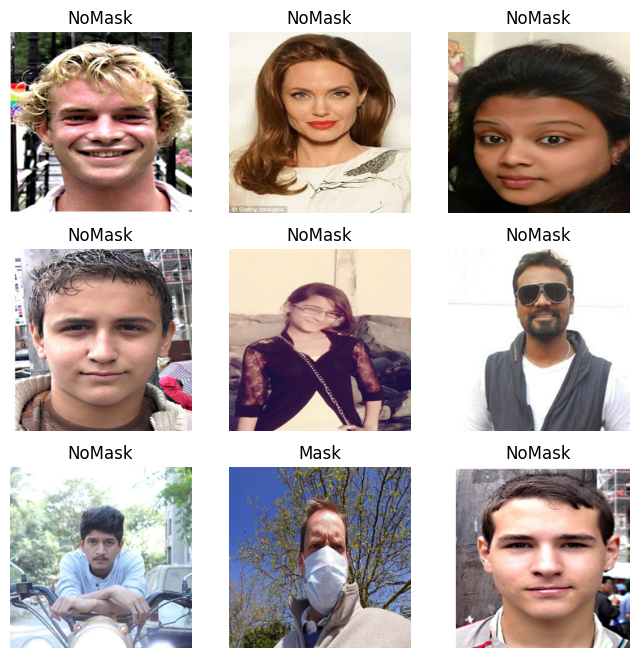

In [ ]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_train[idx])
    plt.axis('off')
    plt.title(class_name[y_train[idx]])
plt.show()

- 정규화: Min-Max Scaler

In [ ]:
X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

In [ ]:
X_train.shape

(600, 224, 224, 3)

### 모델링(Modeling)

In [ ]:
model = keras.Sequential([
    layers.Conv2D(32, 3, input_shape=(224, 224, 3)), 
    layers.BatchNormalization(), 
    layers.ReLU(), 
    layers.MaxPool2D(2), 

    layers.Conv2D(64, 3), 
    layers.BatchNormalization(), 
    layers.ReLU(), 
    layers.MaxPool2D(2), 

    layers.Conv2D(128, 3), 
    layers.BatchNormalization(), 
    layers.ReLU(), 
    layers.MaxPool2D(2), 

    layers.Flatten(), 
    layers.Dense(64, activation='relu'), 
    layers.Dropout(0.3), 
    layers.Dense(32, activation='relu'), 
    layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 32)     128       
 ormalization)                                                   
                                                                 
 re_lu (ReLU)                (None, 222, 222, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 batch_normalization_1 (Batc  (None, 109, 109, 64)     2

### 컴파일(Compile)

In [ ]:
model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['acc']
)

### 학습(Training)
- 콜백(callbacks)

In [ ]:
from tensorflow.keras import callbacks

ckpt_path = 'mask_detection.ckpt'

ckpt_callback = callbacks.ModelCheckpoint(
    ckpt_path, 
    monitor='val_loss', 
    save_weights_only=True, 
    save_best_only=True, 
    verbose=1
)

es_callback = callbacks.EarlyStopping(
    monitor='val_loss', 
    patience=5
)

In [ ]:
%%time
EPOCHS = 30
BATCH_SIZE = 32

history = model.fit(X_train, y_train, 
                    epochs=EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_data=(X_val, y_val), 
                    callbacks=[ckpt_callback, es_callback], 
                    verbose=1)

Epoch 1/30
19/19 [==============================] - ETA: 0s - loss: 5.7463 - acc: 0.7267
Epoch 1: val_loss improved from inf to 1.03910, saving model to mask_detection.ckpt
19/19 [==============================] - 17s 187ms/step - loss: 5.7463 - acc: 0.7267 - val_loss: 1.0391 - val_acc: 0.5850
Epoch 2/30
19/19 [==============================] - ETA: 0s - loss: 1.7902 - acc: 0.8550
Epoch 2: val_loss did not improve from 1.03910
19/19 [==============================] - 2s 92ms/step - loss: 1.7902 - acc: 0.8550 - val_loss: 1.2831 - val_acc: 0.5065
Epoch 3/30
19/19 [==============================] - ETA: 0s - loss: 0.7948 - acc: 0.8433
Epoch 3: val_loss did not improve from 1.03910
19/19 [==============================] - 2s 94ms/step - loss: 0.7948 - acc: 0.8433 - val_loss: 1.3091 - val_acc: 0.5065
Epoch 4/30
19/19 [==============================] - ETA: 0s - loss: 0.5200 - acc: 0.8783
Epoch 4: val_loss improved from 1.03910 to 0.68373, saving model to mask_detection.ckpt
19/19 [=========

- 학습 과정 시각화

In [ ]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'],label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'],label = 'Val Loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'],label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'],label = 'Val Accuracy')

    plt.legend()
    plt.show()

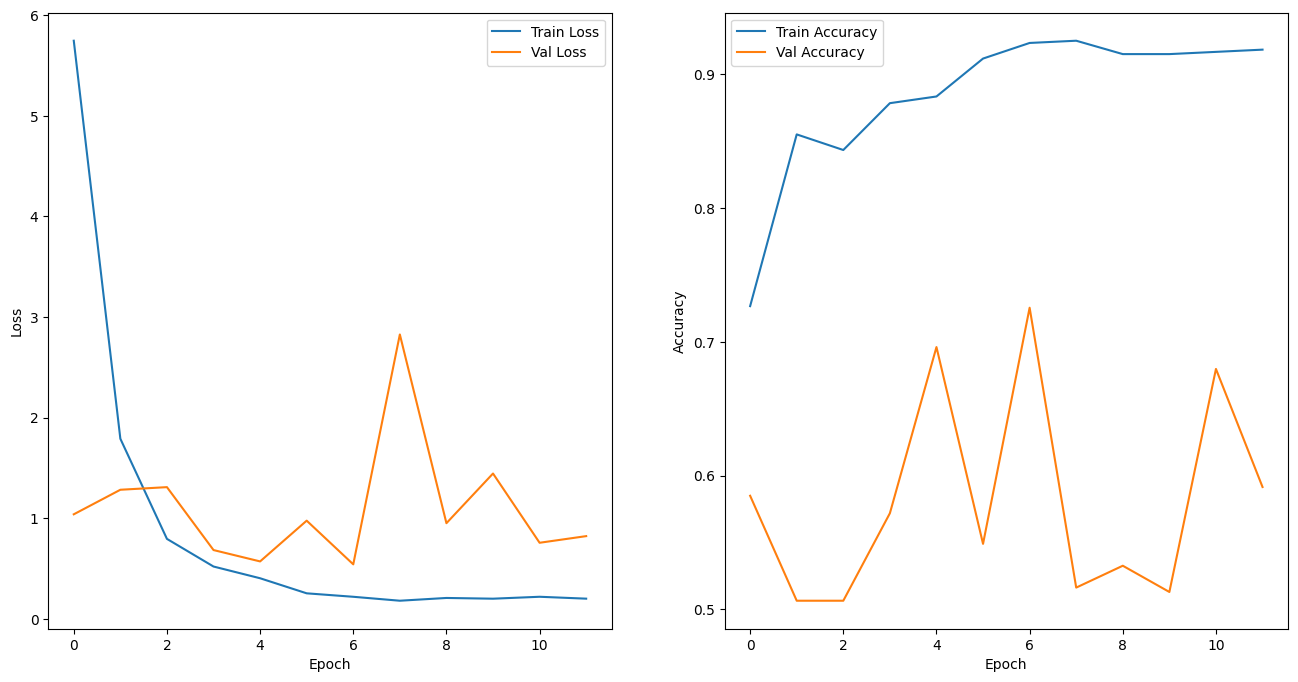

In [ ]:
plot_history(history)

### 평가(Evaluation)

In [ ]:
model.load_weights(ckpt_path)

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 55ms/step - loss: 0.5258 - acc: 0.7700


[0.5257711410522461, 0.7699999809265137]

### 예측(Prediction)

In [ ]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 21ms/step


In [ ]:
y_pred.shape

(100, 1)

In [ ]:
y_test.shape

(100,)

In [ ]:
y_pred = y_pred.flatten()
y_pred = (y_pred>0.5).astype('int')
y_pred[:5]

array([1, 1, 1, 0, 0])

- 혼동 행렬(confusion matrix)

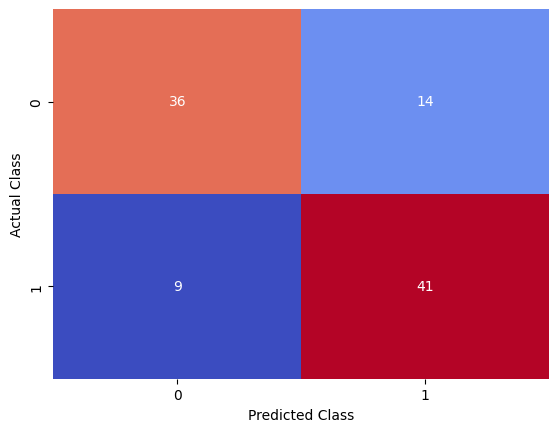

In [ ]:
from sklearn.metrics import confusion_matrix

cfm = confusion_matrix(y_test, y_pred)
sns.heatmap(cfm, annot=True, cbar=False, cmap='coolwarm', fmt='d')
plt.ylabel('Actual Class')
plt.xlabel('Predicted Class')
plt.show()

- 예측 실패한 이미지 그리기

In [ ]:
samples = np.where((y_test == y_pred) == False)[0]
samples = np.random.choice(samples, 9)
samples

array([74,  1,  1, 20, 69, 69, 28, 44, 17])

In [ ]:
X_test = X_test.reshape(-1, 224, 224, 3)

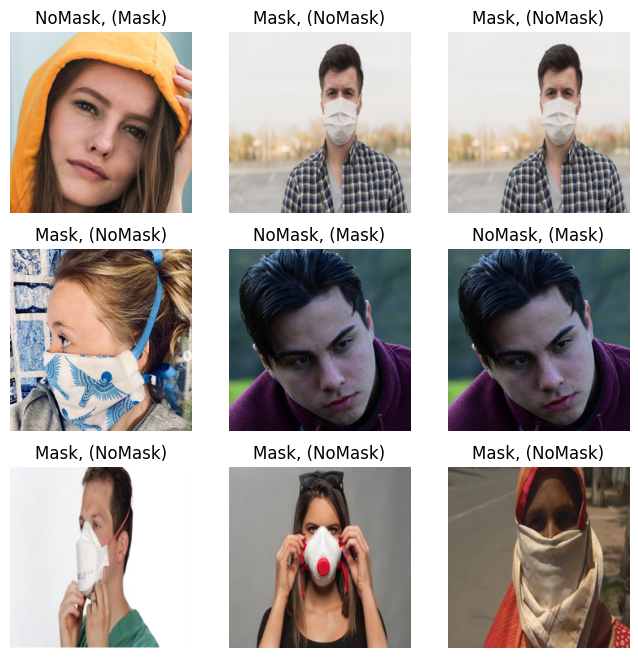

In [ ]:
plt.figure(figsize=(8, 8))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[idx])
    plt.axis('off')
    plt.title(f'{class_name[y_test[idx]]}, ({class_name[y_pred[idx]]})')
plt.show()